<h3> 2016 Ecological Footprint Exploratory Data Analysis

In [2]:
print('Hello World')

Hello World


<h5>This EDA is expected to get insights from the following queries:</h5>

* Ecological Deficit / Reserve of South East Asian countries.
* Countries with highest and lowest number of population in the World / South East Asia.
* Countries with highest and lowest ecological footprint / biocapacity.
* Comparison between forest footprint and forest land.
* Comparison between cropland footprint and cropland area.
* Comparison between grazing footprint and grazing land.
* Comparison between fish footprint and fishing water.
* Comparison between carbon footprint and urban land.
* Relationship between GDP per capita and Ecological Footprint.
* Relationship between Population and Ecological Footprint.
* Countries with highest and lowest carbon emissions and its relationship to its population.


In [3]:
#Importing the necessary libraries
import pandas as pd

In [4]:
#Loading the dataset

EF_df = pd.read_csv('EcologicalFootprint.csv')

#Looking for the first five rows
EF_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [5]:
#Some information about the dataset
print('Shape: ', EF_df.shape)
print('Size: ', EF_df.size)

Shape:  (188, 21)
Size:  3948


There are a total of 3948 records in the dataset with 188 rows and 21 columns.

In [6]:
#Analyzing the columns
EF_df.columns

Index(['Country', 'Region', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required', 'Data Quality'],
      dtype='object')

Some columns are not necessary in this analysis so we will drop them later.

In [7]:
#Check for descriptive data
EF_df.describe(include='all')

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
count,188,188,188.000000,172.00000,173,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,188.000000,188.000000,188.000000,188.000000,188
unique,188,7,NaN,NaN,173,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,Afghanistan,Africa,NaN,NaN,$614.66,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
freq,1,52,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
mean,NaN,NaN,37.342372,0.68636,NaN,0.578208,0.263179,0.373815,1.804913,0.122486,...,0.531850,0.456590,2.459191,0.595145,0.067110,4.019681,0.702074,1.915745,4.037397,NaN
std,NaN,NaN,140.756836,0.15604,NaN,0.355691,0.352067,0.359349,1.898283,0.158427,...,0.672567,1.014738,10.593956,1.661872,0.054844,11.689075,11.771339,1.369624,12.444616,NaN
min,NaN,NaN,0.000000,0.34000,NaN,0.070000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,-14.140000,0.240000,0.020000,NaN
25%,NaN,NaN,2.037500,0.55750,NaN,0.350000,0.080000,0.170000,0.420000,0.020000,...,0.180000,0.030000,0.060000,0.030000,0.030000,0.675000,-1.935000,0.855000,0.942500,NaN
50%,NaN,NaN,7.970000,0.72000,NaN,0.520000,0.180000,0.260000,1.140000,0.070000,...,0.350000,0.120000,0.340000,0.110000,0.050000,1.310000,-0.730000,1.580000,1.705000,NaN
75%,NaN,NaN,24.870000,0.80250,NaN,0.700000,0.320000,0.460000,2.600000,0.150000,...,0.590000,0.340000,1.170000,0.370000,0.090000,2.815000,0.212500,2.677500,2.847500,NaN


The World has 195 total countries but only 188 countries have records in this particular dataset so there are 7 missing country.

In [8]:
#Display information about the columns
EF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         188 non-null    object 
 1   Region                          188 non-null    object 
 2   Population (millions)           188 non-null    float64
 3   HDI                             172 non-null    float64
 4   GDP per Capita                  173 non-null    object 
 5   Cropland Footprint              173 non-null    float64
 6   Grazing Footprint               173 non-null    float64
 7   Forest Footprint                173 non-null    float64
 8   Carbon Footprint                173 non-null    float64
 9   Fish Footprint                  173 non-null    float64
 10  Total Ecological Footprint      188 non-null    float64
 11  Cropland                        173 non-null    float64
 12  Grazing Land                    173 

GDP per Capita's data type is an object. For us to be able to sort its values, we will change its data type to a float.

In [9]:

#Check for the number of missing values
EF_df.isna().sum()

Country                            0
Region                             0
Population (millions)              0
HDI                               16
GDP per Capita                    15
Cropland Footprint                15
Grazing Footprint                 15
Forest Footprint                  15
Carbon Footprint                  15
Fish Footprint                    15
Total Ecological Footprint         0
Cropland                          15
Grazing Land                      15
Forest Land                       15
Fishing Water                     15
Urban Land                        15
Total Biocapacity                  0
Biocapacity Deficit or Reserve     0
Earths Required                    0
Countries Required                 0
Data Quality                       0
dtype: int64

After looking at the relevant information on our datasets. We will perform some basic transformation.

We will fill all the missing values with zero.

In [10]:
#Filling the missing values with zero. 
EF_df.fillna(0, inplace=True)


In [11]:
#Check again if the results are different.
EF_df.isna().sum()

Country                           0
Region                            0
Population (millions)             0
HDI                               0
GDP per Capita                    0
Cropland Footprint                0
Grazing Footprint                 0
Forest Footprint                  0
Carbon Footprint                  0
Fish Footprint                    0
Total Ecological Footprint        0
Cropland                          0
Grazing Land                      0
Forest Land                       0
Fishing Water                     0
Urban Land                        0
Total Biocapacity                 0
Biocapacity Deficit or Reserve    0
Earths Required                   0
Countries Required                0
Data Quality                      0
dtype: int64

'Data Quality' column is not necessary in this analysis so we will drop it.


In [12]:
#Removing the 'Data Quality' column
EF_df.drop('Data Quality', axis=1, inplace=True)


In [13]:
#Check if the 'Data Quality' column is remove.
EF_df.columns

Index(['Country', 'Region', 'Population (millions)', 'HDI', 'GDP per Capita',
       'Cropland Footprint', 'Grazing Footprint', 'Forest Footprint',
       'Carbon Footprint', 'Fish Footprint', 'Total Ecological Footprint',
       'Cropland', 'Grazing Land', 'Forest Land', 'Fishing Water',
       'Urban Land', 'Total Biocapacity', 'Biocapacity Deficit or Reserve',
       'Earths Required', 'Countries Required'],
      dtype='object')

<h4>Now we can proceed in analysing the data and answering our queries.

We will create a subset dataframe for South East Asian countries.

In [14]:
#Creating the dataframe

SEA_countries = ['Brunei', 'Burma', 'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

SEA_EF_df = EF_df.loc[EF_df['Country'].isin(SEA_countries)]

SEA_EF_df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required
30,Cambodia,Asia-Pacific,14.86,0.55,$877.64,0.00,0.00,0.00,0.00,0.00,1.21,0.00,0.00,0.00,0.00,0.00,1.09,-0.11,0.70,1.11
80,Indonesia,Asia-Pacific,246.86,0.68,"$3,688.53",0.44,0.03,0.20,0.64,0.21,1.58,0.46,0.06,0.30,0.38,0.06,1.26,-0.32,0.91,1.25
106,Malaysia,Asia-Pacific,29.24,0.77,"$10,252.60",0.67,0.12,0.38,2.10,0.36,3.71,0.75,0.01,0.73,0.84,0.07,2.41,-1.30,2.14,1.54
135,Philippines,Asia-Pacific,96.71,0.66,"$2,379.44",0.36,0.03,0.09,0.34,0.23,1.10,0.32,0.02,0.09,0.07,0.05,0.54,-0.56,0.64,2.03
152,Singapore,Asia-Pacific,5.30,0.91,"$53,122.40",0.67,0.24,0.91,5.91,0.22,7.97,0.00,0.00,0.00,0.01,0.03,0.05,-7.92,4.61,159.47
167,Thailand,Asia-Pacific,66.78,0.72,"$5,479.29",0.67,0.02,0.24,1.54,0.13,2.66,0.77,0.01,0.20,0.19,0.07,1.24,-1.42,1.54,2.14
168,Timor-Leste,Asia-Pacific,1.11,0.60,"$5,167.86",0.25,0.07,0.04,0.06,0.02,0.48,0.21,0.06,0.52,0.94,0.04,1.78,1.30,0.28,0.27


In [15]:
#Check the Ecological Deficit / Reserve of each SEA country

SEA_EF_df.loc[SEA_EF_df['Biocapacity Deficit or Reserve'].sort_values(ascending=False).index, ['Country', 'Biocapacity Deficit or Reserve']]

,Country,Biocapacity Deficit or Reserve
168,Timor-Leste,1.30
30,Cambodia,-0.11
80,Indonesia,-0.32
135,Philippines,-0.56
106,Malaysia,-1.30
167,Thailand,-1.42
152,Singapore,-7.92


<h4>Visualization

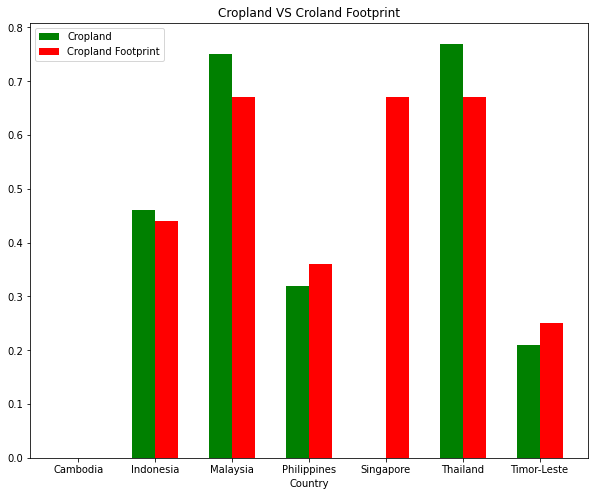

In [38]:
#Import visualization library
import matplotlib.pyplot as plt
import numpy as np

Cropland = SEA_EF_df['Cropland']
Cropland_Footprint = SEA_EF_df['Cropland Footprint']
  
n=7
r = np.arange(n)
width = 0.3
  
plt.figure(figsize=(10, 8))
plt.bar(r, Cropland, color = 'g',width = width,label='Cropland')
plt.bar(r + width, Cropland_Footprint, color = 'r',width = width, label='Cropland Footprint')
  
plt.xlabel("Country")
plt.title("Cropland VS Croland Footprint")

  

plt.xticks(r + width/2, SEA_EF_df['Country'])
plt.legend()
  
plt.show()

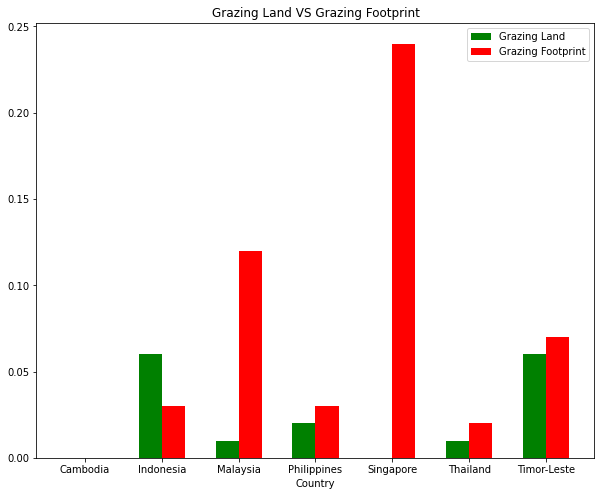

In [40]:
Grazing_Footprint = SEA_EF_df['Grazing Footprint']
Grazing_Land = SEA_EF_df['Grazing Land']

n=7
r = np.arange(n)
width = 0.3
  
plt.figure(figsize=(10, 8))
plt.bar(r, Grazing_Land, color = 'g',width = width, label='Grazing Land')
plt.bar(r + width, Grazing_Footprint, color = 'r',width = width, label='Grazing Footprint')
  
plt.xlabel("Country")
plt.title("Grazing Land VS Grazing Footprint")

plt.xticks(r + width/2, SEA_EF_df['Country'])
plt.legend()
  
plt.show()

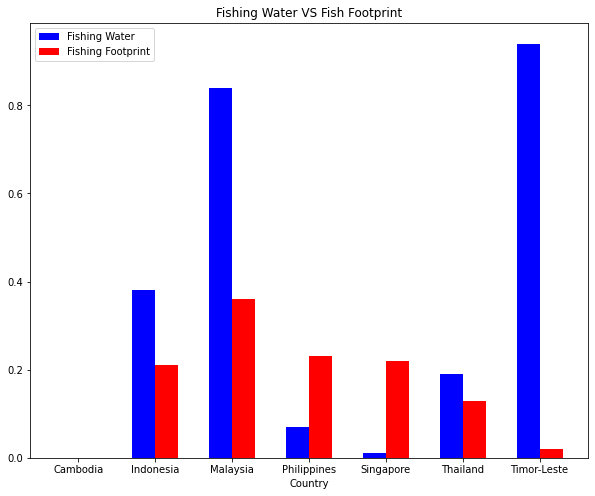

In [42]:
Fishing_Water = SEA_EF_df['Fishing Water']
Fish_Footprint = SEA_EF_df['Fish Footprint']

n=7
r = np.arange(n)
width = 0.3
  
plt.figure(figsize=(10, 8))
plt.bar(r, Fishing_Water, color = 'b',width = width, label='Fishing Water')
plt.bar(r + width, Fish_Footprint, color = 'r',width = width, label='Fishing Footprint')
  
plt.xlabel("Country")
plt.title("Fishing Water VS Fish Footprint")

plt.xticks(r + width/2, SEA_EF_df['Country'])
plt.legend()
  
plt.show()

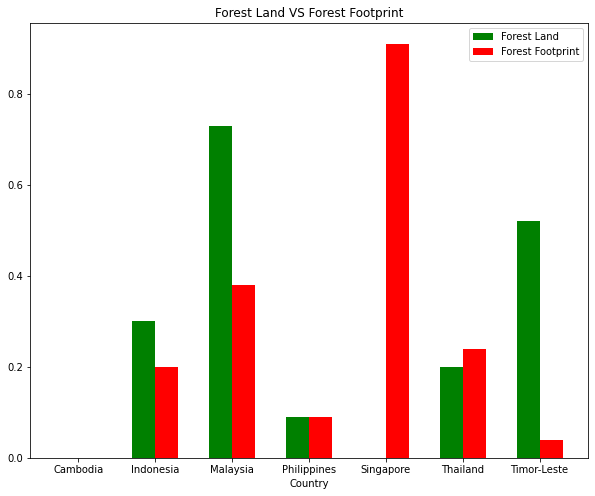

In [43]:
Forest_Land = SEA_EF_df['Forest Land']
Forest_Footprint = SEA_EF_df['Forest Footprint']

n=7
r = np.arange(n)
width = 0.3
  
plt.figure(figsize=(10, 8))
plt.bar(r, Forest_Land, color = 'g',width = width, label='Forest Land')
plt.bar(r + width, Forest_Footprint, color = 'r',width = width, label='Forest Footprint')
  
plt.xlabel("Country")
plt.title("Forest Land VS Forest Footprint")

plt.xticks(r + width/2, SEA_EF_df['Country'])
plt.legend()
  
plt.show()